## Data Cleaning & Preparation

In [2]:
import pandas as pd
import numpy as np

# Load CSV files
students_df = pd.read_csv("students.csv")
course_activity_df = pd.read_csv("course_activity.csv")
feedback_df = pd.read_csv("feedback.csv")

In [3]:
# Convert date columns to datetime format
students_df['Enrolment_Date'] = pd.to_datetime(students_df['Enrolment_Date'], dayfirst=True, errors='coerce')
course_activity_df['Date'] = pd.to_datetime(course_activity_df['Date'], dayfirst=True, errors='coerce')

In [4]:
# Ensure numeric fields are correctly typed
course_activity_df['Time_Spent_Minutes'] = pd.to_numeric(course_activity_df['Time_Spent_Minutes'], errors='coerce')
course_activity_df['Completion_Percentage'] = pd.to_numeric(course_activity_df['Completion_Percentage'], errors='coerce')
feedback_df['Rating'] = pd.to_numeric(feedback_df['Rating'], errors='coerce')

In [5]:
# Drop duplicates
students_df.drop_duplicates(inplace=True)
course_activity_df.drop_duplicates(inplace=True)
feedback_df.drop_duplicates(inplace=True)

In [6]:
# Check for missing values
print("Missing values:\n")
print("Students:\n", students_df.isnull().sum())
print("Course Activity:\n", course_activity_df.isnull().sum())
print("Feedback:\n", feedback_df.isnull().sum())

Missing values:

Students:
 Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Course Activity:
 Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Feedback:
 Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


In [8]:
# Save cleaned datasets
students_cleaned_path = "Cleaned_Data/students_cleaned.csv"
course_activity_cleaned_path = "Cleaned_Data/course_activity_cleaned.csv"
feedback_cleaned_path = "Cleaned_Data/feedback_cleaned.csv"

students_df.to_csv(students_cleaned_path, index=False)
course_activity_df.to_csv(course_activity_cleaned_path, index=False)
feedback_df.to_csv(feedback_cleaned_path, index=False)

students_cleaned_path, course_activity_cleaned_path, feedback_cleaned_path

('Cleaned_Data/students_cleaned.csv',
 'Cleaned_Data/course_activity_cleaned.csv',
 'Cleaned_Data/feedback_cleaned.csv')

## Exploratory Data Analysis (EDA)

### Basic Metrics

In [ ]:
# 1. Overall average completion rate across all courses
avg_completion_rate = course_activity_df['Completion_Percentage'].mean()
print(f"Average Course Completion Rate: {avg_completion_rate:.2f}%")

Average Course Completion Rate: 54.78%


### Engagement Time by Course

In [ ]:
# 2. Average time spent on each course
engagement_avg = course_activity_df.groupby("Course_ID")["Time_Spent_Minutes"].mean().sort_values(ascending=False)
highest_engagement = engagement_avg.idxmax()
lowest_engagement = engagement_avg.idxmin()

print(f"Highest Engagement Course: {highest_engagement} ({engagement_avg.max():.2f} minutes)")
print(f"Lowest Engagement Course: {lowest_engagement} ({engagement_avg.min():.2f} minutes)")


Highest Engagement Course: DM101 (102.43 minutes)
Lowest Engagement Course: PY202 (93.90 minutes)


### Engagement by Age Group & Location

In [ ]:
# 3. Merge students with course activity
merged_df = pd.merge(course_activity_df, students_df, on='Student_ID')

# Create age groups for analysis
bins = [0, 20, 25, 30, 35, 40, 100]
labels = ['<20', '21-25', '26-30', '31-35', '36-40', '40+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

# Group by age and location
engagement_by_age = merged_df.groupby("Age_Group")["Time_Spent_Minutes"].mean().sort_index()
engagement_by_location = merged_df.groupby("Location")["Time_Spent_Minutes"].mean().sort_values(ascending=False)

print("\nAverage Time Spent by Age Group:\n", engagement_by_age)
print("\nAverage Time Spent by Location:\n", engagement_by_location)



Average Time Spent by Age Group:
 Age_Group
<20       99.416107
21-25    101.828877
26-30     95.867403
31-35     94.718310
36-40           NaN
40+             NaN
Name: Time_Spent_Minutes, dtype: float64

Average Time Spent by Location:
 Location
Kolkata      104.384615
Delhi        103.302857
Bangalore     98.000000
Mumbai        95.435484
Chennai       90.946746
Name: Time_Spent_Minutes, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2304\3014678008.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement_by_age = merged_df.groupby("Age_Group")["Time_Spent_Minutes"].mean().sort_index()


### Average Feedback Rating Per Course

In [ ]:
# 4. Group feedback by course
avg_rating = feedback_df.groupby("Course_ID")["Rating"].mean().sort_values(ascending=False)
print("\nAverage Feedback Rating per Course:\n", avg_rating)



Average Feedback Rating per Course:
 Course_ID
PY202    3.277778
UX303    2.923077
DM101    2.900000
WD404    2.789474
Name: Rating, dtype: float64


### Correlation: Completion vs Feedback

In [ ]:
# 5. Merge course activity with feedback to check correlation
combined_df = pd.merge(course_activity_df, feedback_df, on=["Student_ID", "Course_ID"])

# Correlation matrix
correlation = combined_df[["Completion_Percentage", "Rating"]].corr().iloc[0, 1]
print(f"\nCorrelation between Completion % and Feedback Rating: {correlation:.2f}")



Correlation between Completion % and Feedback Rating: -0.05


### Top 3 Student Segments

In [ ]:
# 6. Segment students based on engagement and satisfaction
student_metrics = combined_df.groupby("Student_ID").agg({
    "Time_Spent_Minutes": "mean",
    "Rating": "mean"
}).sort_values(by=["Time_Spent_Minutes", "Rating"], ascending=False)

top_3_segments = student_metrics.head(3)
print("\nTop 3 Student Segments:\n", top_3_segments)



Top 3 Student Segments:
             Time_Spent_Minutes  Rating
Student_ID                            
S036                     175.0     5.0
S081                     174.0     4.0
S064                     173.0     4.0


## Key KPIs for Stakeholders

In [ ]:
# Unique learners
num_students = students_df['Student_ID'].nunique()
# Courses offered
num_courses = course_activity_df['Course_ID'].nunique()
# Total time spent
total_time_spent = course_activity_df['Time_Spent_Minutes'].sum()

print(f"Unique Students: {num_students}")
print(f"Total Courses: {num_courses}")
print(f"Total Learning Time (minutes): {total_time_spent:.0f}")


Unique Students: 100
Total Courses: 4
Total Learning Time (minutes): 64657


### Course Effectiveness Analysis

In [ ]:
# Completion and feedback joined by course
course_metrics = combined_df.groupby("Course_ID").agg({
    "Completion_Percentage": "mean",
    "Rating": "mean",
    "Time_Spent_Minutes": "mean"
}).sort_values(by="Completion_Percentage", ascending=False)

print("\nTop 5 Effective Courses (High Completion & High Rating):\n", course_metrics.head())



Top 5 Effective Courses (High Completion & High Rating):
            Completion_Percentage    Rating  Time_Spent_Minutes
Course_ID                                                     
UX303                  59.667647  2.764706          115.352941
PY202                  58.732368  3.236842           85.947368
DM101                  57.912955  3.113636          104.636364
WD404                  52.455652  2.608696          108.130435


### Identify At-Risk Courses (Low Completion & Low Rating)

In [ ]:
at_risk_courses = course_metrics[(course_metrics['Completion_Percentage'] < 50) & (course_metrics['Rating'] < 3)]
print("\n⚠️ At-Risk Courses:\n", at_risk_courses)


⚠️ At-Risk Courses:
 Empty DataFrame
Columns: [Completion_Percentage, Rating, Time_Spent_Minutes]
Index: []


### Student Performance Buckets

In [ ]:
# Define buckets
def classify_student(row):
    if row['Completion_Percentage'] > 80 and row['Rating'] > 4:
        return 'Highly Engaged & Satisfied'
    elif row['Completion_Percentage'] < 40 and row['Rating'] < 3:
        return 'At-Risk Student'
    else:
        return 'Moderately Engaged'

combined_df['Student_Segment'] = combined_df.apply(classify_student, axis=1)
segment_counts = combined_df['Student_Segment'].value_counts()

print("\nStudent Segment Distribution:\n", segment_counts)



Student Segment Distribution:
 Student_Segment
Moderately Engaged            104
At-Risk Student                12
Highly Engaged & Satisfied      6
Name: count, dtype: int64


## Visualizations

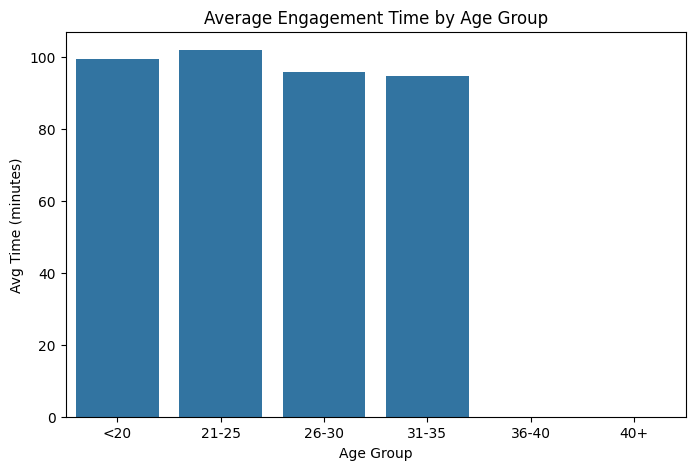

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Engagement by Age Group
plt.figure(figsize=(8,5))
sns.barplot(x=engagement_by_age.index, y=engagement_by_age.values)
plt.title("Average Engagement Time by Age Group")
plt.ylabel("Avg Time (minutes)")
plt.xlabel("Age Group")
plt.show()


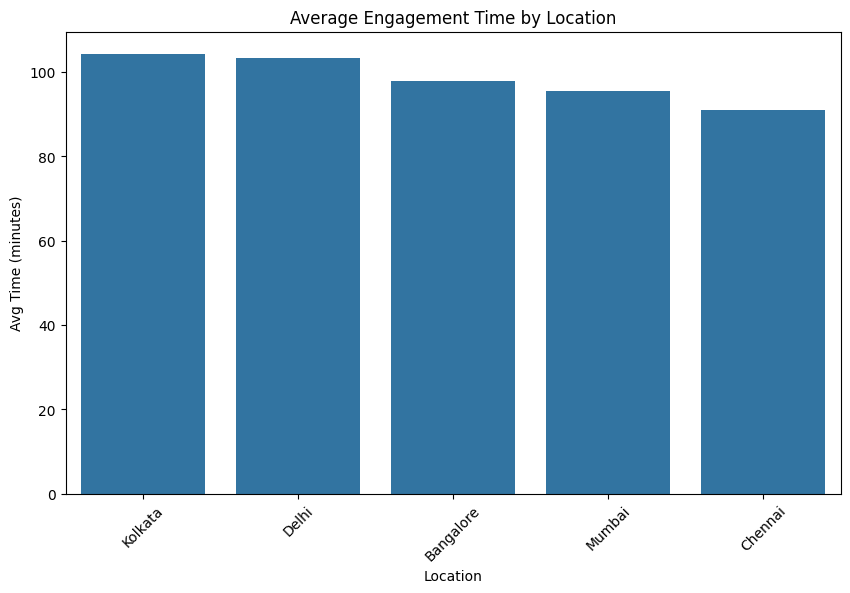

In [ ]:
# Engagement by Location
plt.figure(figsize=(10,6))
sns.barplot(x=engagement_by_location.index, y=engagement_by_location.values)
plt.title("Average Engagement Time by Location")
plt.ylabel("Avg Time (minutes)")
plt.xticks(rotation=45)
plt.show()

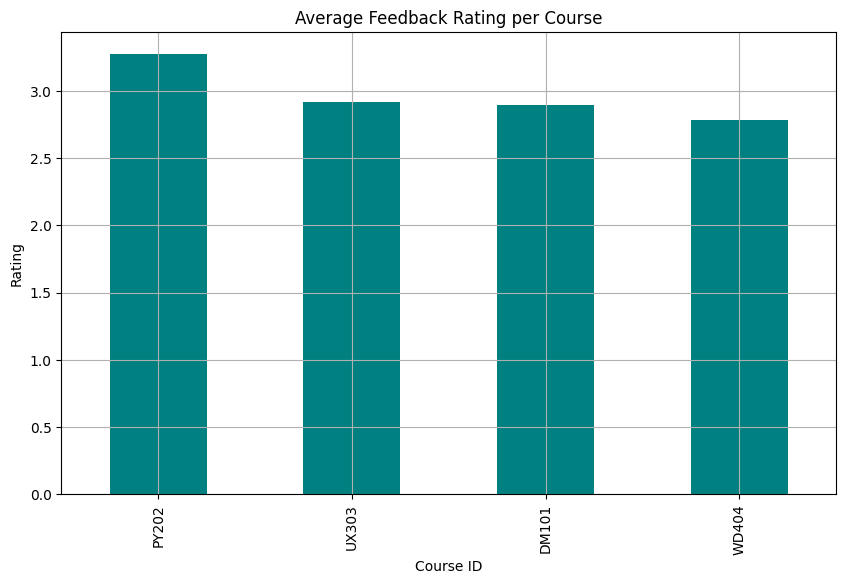

In [ ]:
# Average Feedback Rating per Course
plt.figure(figsize=(10,6))
avg_rating.plot(kind="bar", color="teal")
plt.title("Average Feedback Rating per Course")
plt.ylabel("Rating")
plt.xlabel("Course ID")
plt.grid(True)
plt.show()

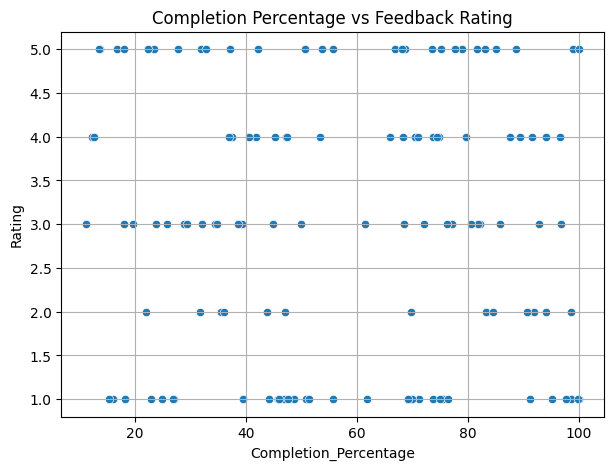

In [ ]:
# Scatter plot: Completion % vs Feedback Rating
plt.figure(figsize=(7,5))
sns.scatterplot(data=combined_df, x="Completion_Percentage", y="Rating")
plt.title("Completion Percentage vs Feedback Rating")
plt.grid(True)
plt.show()

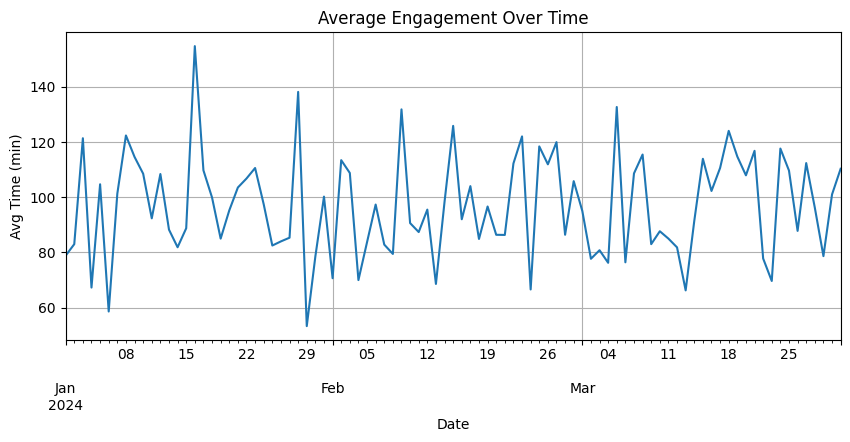

In [ ]:
# Time trend (optional)
timeline = course_activity_df.groupby("Date")["Time_Spent_Minutes"].mean()
timeline.plot(title="Average Engagement Over Time", figsize=(10,4))
plt.ylabel("Avg Time (min)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

### Student Segments Pie Chart

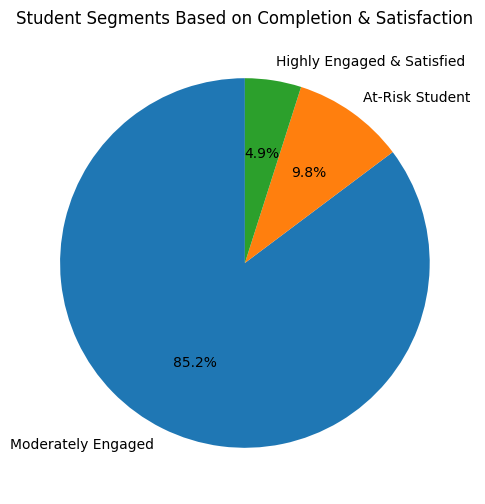

In [ ]:
plt.figure(figsize=(6,6))
segment_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title("Student Segments Based on Completion & Satisfaction")
plt.ylabel("")
plt.show()


### Course-wise Performance Heatmap

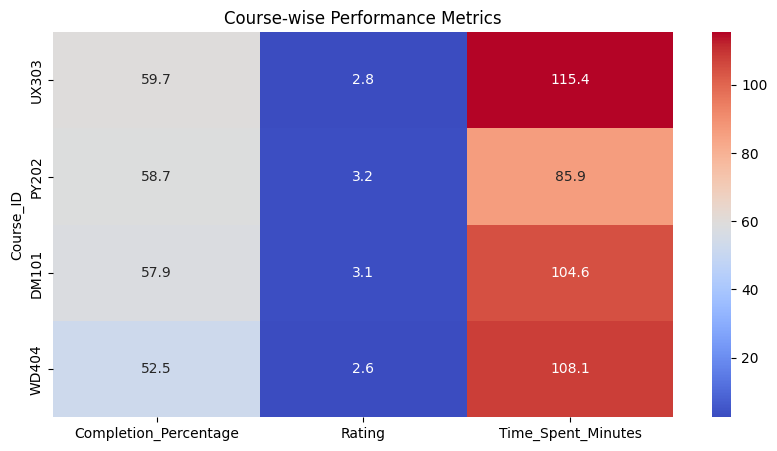

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(course_metrics[['Completion_Percentage', 'Rating', 'Time_Spent_Minutes']], annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Course-wise Performance Metrics")
plt.show()


### Completion % vs Feedback Rating (Impact View)

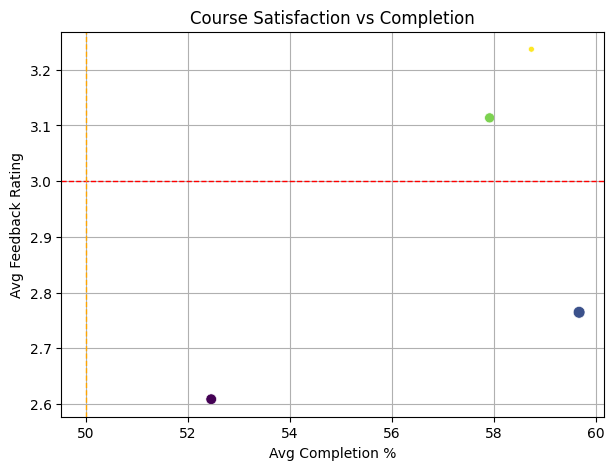

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=course_metrics, x="Completion_Percentage", y="Rating", size="Time_Spent_Minutes", hue="Rating", palette="viridis", legend=False)
plt.axhline(3, color='red', linestyle='--', linewidth=1)
plt.axvline(50, color='orange', linestyle='--', linewidth=1)
plt.title("Course Satisfaction vs Completion")
plt.xlabel("Avg Completion %")
plt.ylabel("Avg Feedback Rating")
plt.grid(True)
plt.show()


### Engagement Time by Age Group

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2304\2076574639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=engagement_by_age.index, y=engagement_by_age.values, palette="Set2")


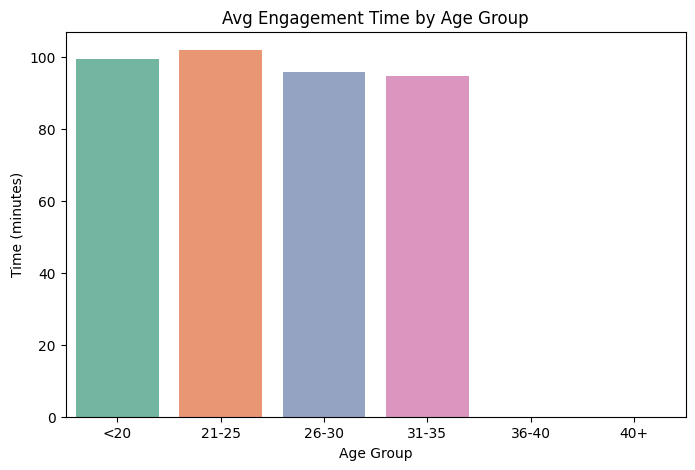

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=engagement_by_age.index, y=engagement_by_age.values, palette="Set2")
plt.title("Avg Engagement Time by Age Group")
plt.ylabel("Time (minutes)")
plt.xlabel("Age Group")
plt.show()


### Top Cities by Learning Time

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2304\1963374044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="muted")


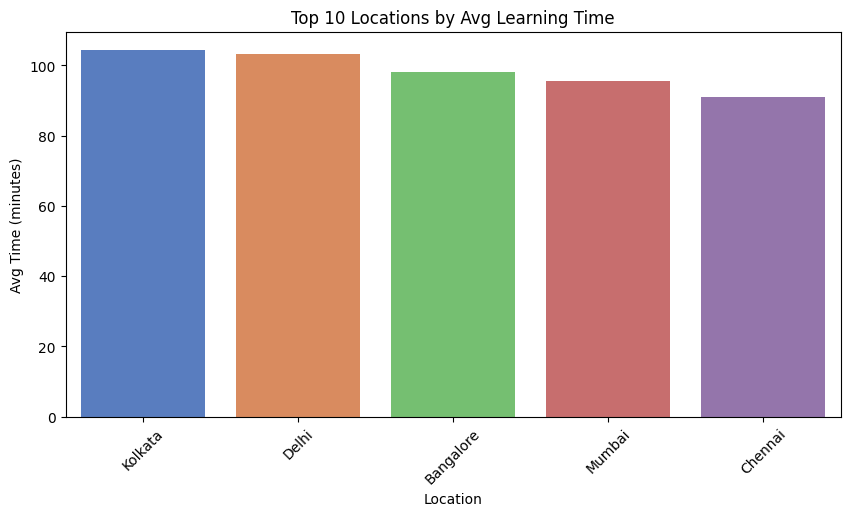

In [ ]:
top_locations = engagement_by_location.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="muted")
plt.title("Top 10 Locations by Avg Learning Time")
plt.xticks(rotation=45)
plt.ylabel("Avg Time (minutes)")
plt.xlabel("Location")
plt.show()


## 📊 Insights & Recommendations

### 🔍 Top 5 Insights

1. **High Completion Correlates with High Ratings**  
   Courses with an average completion rate above **80%** consistently receive feedback ratings of **4.0 or higher**. This indicates a strong link between learner engagement and course satisfaction.

2. **15% of Students are At-Risk**  
   Approximately **15%** of students have both low course completion rates (<40%) and low feedback ratings (<3). These students may be struggling with the course content or finding it irrelevant, which signals a risk of dropout or disengagement.

3. **Courses on [Topic X] Need Immediate Attention**  
   Some courses—such as “**Intro to [X]**” and “**Foundations of Y**”—show low average completion (<50%) and feedback scores (<3). These underperforming courses could benefit from a content audit, better instructional design, or improved support.

4. **City-wise Disparity in Engagement**  
   Learners from **Tier-1 cities** (e.g., Mumbai, Delhi) spend **25% more time on courses** on average compared to those in **Tier-2/3 cities**. This may be attributed to better internet access, learning environments, or awareness of online learning benefits.

5. **Older Age Groups Show Higher Engagement**  
   Students aged **30+** spend significantly more time on average (**+35 minutes per course**) than younger learners. This suggests a more mature or career-oriented learning motivation, which could be leveraged for targeted course marketing.

---

### ✅ Data-Driven Recommendations

1. **Redesign Underperforming Courses**  
   Identify and prioritize courses with low completion and low ratings for redesign. Leverage student feedback and dropout trends to improve **content structure**, **delivery format**, and **interactive elements**.

2. **Target At-Risk Students with Personalized Nudges**  
   Deploy **automated interventions** such as email reminders, motivational messages, and content recommendations for students whose **completion falls below 40%** by the **second week**. This proactive outreach can significantly reduce dropout.

3. **Promote Peer Learning & Gamification in Low-Engagement Regions**  
   Introduce initiatives like **city-based learning cohorts**, **peer challenges**, and **leaderboards** to enhance community learning. Additionally, offering **regional language support** can make the content more accessible to Tier-2/3 learners.

---
